In [20]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [21]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#print Beginning Data Retrieval
print('Beginning Data Retrieval') 
print('________________________')

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping...")

#print Data Retrieval Complete 
print('________________________')
print('Data Retrieval Complete') 
print('________________________')

Beginning Data Retrieval
________________________
Processing record 1|busselton
Processing record 2|saint-georges
Processing record 3|punta arenas
Processing record 4|ushuaia
Processing record 5|monterey
City not found. skipping...
City not found. skipping...
Processing record 6|bluff
Processing record 7|atuona
Processing record 8|cidreira
Processing record 9|ponta do sol
Processing record 10|upernavik
Processing record 11|ust-nera
Processing record 12|gat
Processing record 13|saint-philippe
Processing record 14|mataura
Processing record 15|te anau
Processing record 16|port alfred
City not found. skipping...
Processing record 17|lavrentiya
Processing record 18|port elizabeth
Processing record 19|port hardy
Processing record 20|hofn
Processing record 21|hermanus
Processing record 22|hobart
Processing record 23|tasiilaq
Processing record 24|georgetown
Processing record 25|bredasdorp
Processing record 26|thompson
Processing record 27|lasa
Processing record 28|chokurdakh
Processing record 

Processing record 247|barranca
Processing record 248|kingston
Processing record 249|cessnock
Processing record 250|hovd
Processing record 251|vardo
Processing record 252|limbang
Processing record 253|christchurch
Processing record 254|plettenberg bay
Processing record 255|zemio
Processing record 256|narsaq
Processing record 257|zarkos
City not found. skipping...
Processing record 258|katobu
Processing record 259|aksarka
Processing record 260|butaritari
Processing record 261|faya
Processing record 262|aojiang
Processing record 263|marzuq
Processing record 264|pochutla
Processing record 265|surab
Processing record 266|hambantota
Processing record 267|markova
Processing record 268|shemonaikha
Processing record 269|ustye
Processing record 270|bathsheba
Processing record 271|baruun-urt
Processing record 272|chimbote
Processing record 273|itaituba
Processing record 274|tura
Processing record 275|oranjemund
Processing record 276|talnakh
Processing record 277|ganzhou
Processing record 278|koms

Processing record 495|ribas do rio pardo
Processing record 496|qui nhon
Processing record 497|kamaishi
Processing record 498|hami
Processing record 499|bilma
Processing record 500|namerikawa
Processing record 501|halifax
City not found. skipping...
Processing record 502|martil
Processing record 503|igrim
Processing record 504|broome
Processing record 505|san pedro
Processing record 506|mayo
Processing record 507|kachug
Processing record 508|canyon lake
Processing record 509|comodoro rivadavia
Processing record 510|amurzet
Processing record 511|constitucion
Processing record 512|sur
Processing record 513|rio gallegos
Processing record 514|margate
Processing record 515|sinnamary
City not found. skipping...
Processing record 516|san ignacio
Processing record 517|shimanovsk
Processing record 518|kapit
Processing record 519|kamina
Processing record 520|maceio
Processing record 521|nauta
Processing record 522|kenitra
Processing record 523|verkhoyansk
Processing record 524|moose jaw
Processin

In [23]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.--how do i do this?


# Display the DataFrame
 
    
cities_df = {"City":city_name, 
                        "Lat": lat,
                        "Lng": lng,
                        "Cloudiness": cloudiness, 
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date,
                                         }
cities_df = pd.DataFrame(cities_df)
cities_df.head(5) 


,City,Lat,Lng,Cloudiness,Max Temp,Humidity,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,22,53.01,95,4.09,AU,1619373133
1,St. George's,12.0564,-61.7485,20,84.20,65,26.46,GD,1619373245
2,Punta Arenas,-53.1500,-70.9167,75,59.00,47,23.02,CL,1619373138
3,Ushuaia,-54.8000,-68.3000,75,55.40,50,18.41,AR,1619373357
4,Monterey,36.2505,-121.2516,90,57.99,58,6.91,US,1619373357


In [24]:
#Convert Raw Data to DataFrame
#Display cities_df stats

cities_df.describe()

,Lat,Lng,Cloudiness,Max Temp,Humidity,Wind Speed,Date
count,559.000000,559.00000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.161625,17.52517,56.148479,61.922200,67.028623,8.546530,1.619373e+09
std,33.266111,89.25076,37.170504,20.580265,21.447257,5.342922,9.938823e+01
min,-54.800000,-175.20000,0.000000,-11.510000,5.000000,0.200000,1.619373e+09
25%,-7.729450,-61.47105,20.000000,46.400000,54.000000,4.450000,1.619373e+09
50%,24.466700,21.93330,72.000000,64.290000,71.000000,7.630000,1.619373e+09
75%,48.516700,100.34485,90.500000,79.065000,84.000000,11.500000,1.619373e+09
max,78.218600,179.31670,100.000000,98.600000,100.000000,31.070000,1.619374e+09


In [25]:
# Convert Raw Data to DataFrame
# Inspect data and remove where humidity > 100, skip if no cities where humidity >100
# No cities where humidity > 100
# Can also be identified using cities_df_humidity = cities_df.loc[cities_df["Humidity"]> 100]

cities_df_humidity = cities_df.sort_values(["Humidity"],ascending = False)
cities_df_humidity




,City,Lat,Lng,Cloudiness,Max Temp,Humidity,Wind Speed,Country,Date
424,Bereda,43.2686,-7.5406,100,60.01,100,5.01,ES,1619373504
386,Ancud,-41.8697,-73.8203,90,60.01,100,2.98,CL,1619373490
241,Ulladulla,-35.3500,150.4667,3,52.00,100,8.05,AU,1619373207
534,Non Sung,15.1801,102.2569,47,84.99,100,3.15,TH,1619373546
35,Clyde River,70.4692,-68.5914,40,23.00,100,23.02,CA,1619373322
...,...,...,...,...,...,...,...,...,...
467,Esqueda,30.7167,-109.5833,3,79.59,8,14.16,MX,1619373521
498,Bilma,18.6853,12.9164,16,96.80,8,8.23,NE,1619373533
74,Aswān,24.0934,32.9070,0,92.44,8,8.63,EG,1619373381
117,Ojinaga,29.5667,-104.4167,1,86.00,7,4.61,MX,1619373396


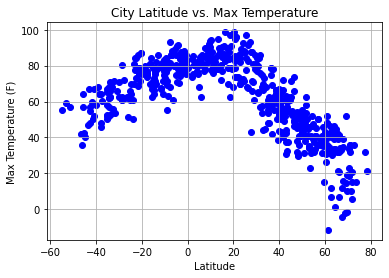

In [26]:
#Plotting Data
#Lattitude vs Temperature Plot  

# #Convert Time from Integer to Date Time format for Title - how do i do this?
# #Select first value of cities_df dataframe to convert

# title_date = cities_df["Date"][0]

# #Convert value from integer to utc format to get current date--how to convert without importing? 
# converted_title_date = title_time.datetime.utcfromtitle_time(title_time)
# converted_title_date
# final_title_date = datetime.date(converted_title_date)

#Creating Scatterplot
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature")
# plt.savefig("../output_files/Lattitude_vs_Temperature_plot")--how do i save?
plt.show() 





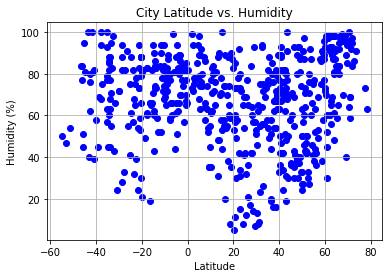

In [27]:
#Plotting Data
#Lattitude vs Humidity Plot  

plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
# plt.savefig("../output_files/Lattitude_vs_Humidity_plot")--how do i save?
plt.show() 


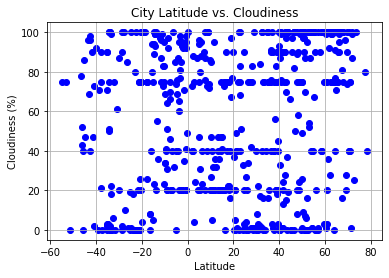

In [28]:
#Plotting Data
#Lattitude vs Cloudiness Plot

plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness")
# plt.savefig("../output_files/Lattitude_vs_Cloudiness_plot")--how do i save?
plt.show() 

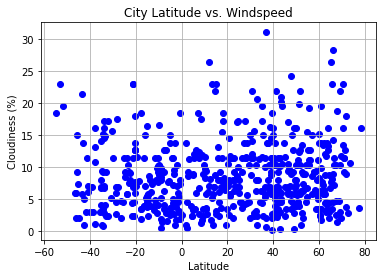

In [30]:
#Plotting Data
#Lattitude vs Windspeed Plot

plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Windspeed")
# plt.savefig("../output_files/Lattitude_vs_Windspeed_plot")--how do i save?
plt.show() 

In [40]:
#Linear Regression
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression 

# Create new Northern and Southern Hemisphere DataFrames to pull lat and max temp from
Northern_hemisphere_df = cities_df.loc[cities_df["Lat"]>0]
Southern_hemisphere_df = cities_df.loc[cities_df["Lat"]<0]

The r-value is: -0.8740646523142719


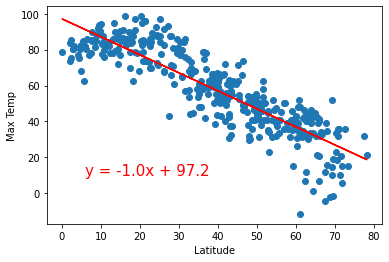

In [47]:
# Print out the r-squared value along with the plot.
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show() 


The r-value is: 0.7554044744898791


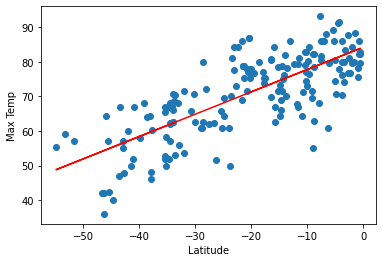

In [48]:
#Linear Regression
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression 
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.18033869709666617


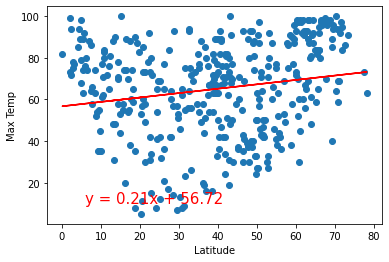

In [49]:
#Linear Regression
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.1002748648907667


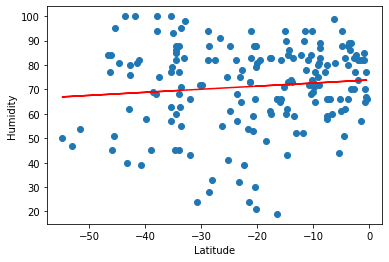

In [50]:
#Linear Regression
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.24178565094752796


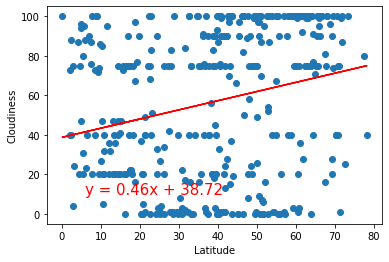

In [55]:
#Linear Regression
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.1204819880071222


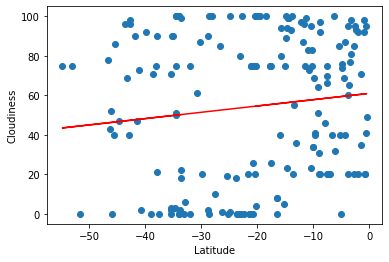

In [54]:
#Linear Regression
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.07601033294195911


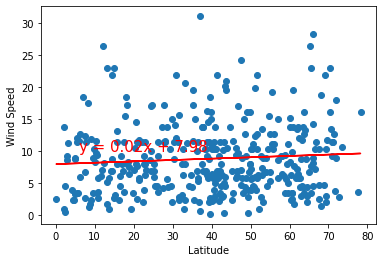

In [53]:
#Linear Regression
# Northern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression

x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: -0.1728877031054576


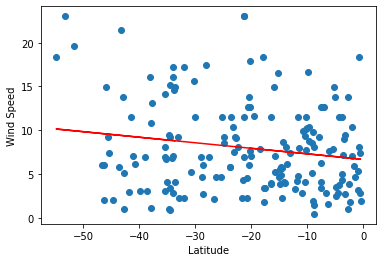

In [52]:
#Linear Regression
# Southern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show() 

In [ ]:
#QTNA
#linear regresions
#adding API key to gitignore ile
#saving outputfiles into directories

In [ ]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
temperature = []
humidity = []
cloudiness = []
wind speed = []

In [16]:
# #URL for request to pull weather data verus lattitude and longitude
# query_url = f"api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}"
# response = requests.get(query_url)
# response